In [2]:
import sys
import numpy as np
from sklearn.linear_model import LogisticRegression
sys.path.insert(0, 'utilities')
import util

Python version: 3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 15:18:16) [MSC v.1916 64 bit (AMD64)]


In [3]:
## read in data
nbrhd_size = 1
# Species ccurrence locations
occurrences_fns = ['data/empidonax_virescens_19_M1.npz',\
                   'data/empidonax_virescens_19_M2.npz',\
                   'data/empidonax_virescens_19_M3.npz']
# Background locations
background_fns = ['data/empidonax_asr1_bkgnd_hull_19_M1.npz',\
                  'data/empidonax_asr1_bkgnd_hull_19_M2.npz',\
                  'data/empidonax_asr1_bkgnd_hull_19_M3.npz']
preprocessed = False

# Covariates stats
cov_stats_fn = 'data/covs_stats.csv'
cov_config_fn = 'data/covs_config.json'

coords, data = util.read_data_modeling_cnn(occurrences_fns, background_fns, nbrhd_size, preprocessed, cov_stats_fn, cov_config_fn)
print('data matrix shape:', data.shape)

## data split: train, validation, test
tr_ratio, eval_ratio, te_ratio = 0.8, 0.1, 0.1

coords_tr, train, coords_te, test = util.train_test_split_with_coords(coords, data, test_size=te_ratio)
coords_tr, train, coords_eval, evaluation = util.train_test_split_with_coords(coords_tr, train, test_size=eval_ratio/(1.0-te_ratio))

print('train: %d, evaluation: %d, test: %d' % (len(train), len(evaluation), len(test)))

data matrix shape: (2084, 152, 1, 1)
train: 1666, evaluation: 209, test: 209


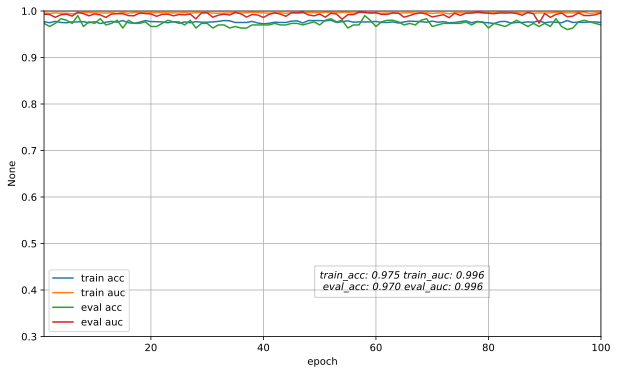

In [4]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
model = LogisticRegression(
    penalty='l2',    
    tol=0.01, 
    C=0.5, 
    solver='sag',#'lbfgs', 
    max_iter=2000, 
    multi_class='auto',
    warm_start=True # Reuse the solution of the previous call to fit as initialization
    )

tr_batch_size, eval_batch_size, num_epochs = 100, 100, 100
train_iter = util.get_data_iterator_cnn(train, batch_size = tr_batch_size)
eval_iter = util.get_data_iterator_cnn(evaluation, batch_size = eval_batch_size)
model_name = str(type(model)).split("'")[1].split('.')[-1]
util.train_model(model, train_iter, eval_iter, num_epochs, figfn='output/progress_scikitlearn_' + model_name + '.png')
